In [15]:
using Pkg
Pkg.add("JuMP")
Pkg.add("PowerModels")
Pkg.add("Ipopt")
Pkg.add("GLPK")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`
Precompiling project...
  ✓ FFTW_jll
  ✓ Arpack_jll
  ✓ Rmath_jll
  ✓ DualNumbers
  ✓ SpecialFunctions → SpecialFunctionsChainRulesCoreExt
  ✓ Arpack
  ✓ Rmath
  ✓ Latexify → DataFramesExt
  ✓ HypergeometricFunctions
  ✓ MultivariateStats
  ✓ StatsFuns
  ✓ StatsFuns → StatsFunsInverseFunctionsExt
  ✓ StatsFuns → StatsFunsChainRulesCoreExt
  ✓ StaticArrays
  ✓ StaticArrays → StaticArraysStatisticsExt
  ✓ ArnoldiMethod
  ✓ ConstructionBase → ConstructionBaseStaticArraysExt
  ✓ Adapt → AdaptStaticArraysExt
  ✓ Distributions
  ✓ GeometryTypes
  ✓ NearestNeighbors
  ✓ FFTW
  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  ✓ Setfield
  ✓ DomainSets
  ✓ IntervalArithmetic
  ✓ OffsetArrays
  ✓ GPUArraysCore
  ✓ ArrayInterface
  ✓ Accessors
  ✓ Distributions → DistributionsTestExt
  ✓ Graphs
  ✓ Clustering
  ✓ Distributions 

In [16]:

# Pin StatPlots to a compatible version
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\mansi\.julia\environments\v1.9\Manifest.toml`


In [17]:
include("C:/Users/mansi/Dropbox/6.7201_optimization_methods/Project/ac-ED.jl")

[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 54 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 101 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 101 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 41 from -360.0 to -60.0 deg

In [18]:
#Analyze ED Results
using Plots
using DataFrames
# Extract solution values
pg_values = value.(pg_ed)

# Extract indices from DenseAxisArray
gen_indices = collect(axes(pg_values)[1]);

PG = zeros(length(gen_indices));
Pmax = zeros(length(gen_indices));
Cost = zeros(length(gen_indices));

for i = 1:length(gen_indices)
PG[gen_indices[i]]  = pg_values[gen_indices[i]]*ref[:baseMVA]
Pmax[gen_indices[i]] = ref[:gen][gen_indices[i]]["pmax"]*ref[:baseMVA]
Cost[gen_indices[i]] = ref[:gen][gen_indices[i]]["cost"][2]/ref[:baseMVA]
end


In [19]:
# Create a DataFrame
df = DataFrame(Active_Power = PG , Maximum_Capacity = Pmax, Marginal_Cost = Cost)
# Display the DataFrame
display(df)

Row,Active_Power,Maximum_Capacity,Marginal_Cost
,Float64,Float64,Float64
1,-8.33908e-7,100.0,40.0
2,-8.33908e-7,100.0,40.0
3,-8.33908e-7,100.0,40.0
4,-8.33908e-7,100.0,40.0
5,436.081,550.0,20.0
6,82.3708,185.0,20.0
7,-8.33908e-7,100.0,40.0
8,-8.33908e-7,100.0,40.0
9,-8.33908e-7,100.0,40.0


In [28]:
Power = [PG Pmax]
Gen = repeat(["Pgen", "Pmax"], inner = 3)
nam = repeat("G" .* string.(1:3), outer = 2)

using Plots
using Statsplots
# Create the dual bar chart
groupedbar(nam, Power, group = Gen, ylabel = "Power (MW)", title = "5-bus system")


LoadError: ArgumentError: Package Statsplots not found in current path.
- Run `import Pkg; Pkg.add("Statsplots")` to install the Statsplots package.

In [21]:
include("C:/Users/mansi/Dropbox/6.7201_optimization_methods/Project/ac-OPF.jl")

[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 1 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 54 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 54 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 101 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 101 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 41 from -360.0 to -60.0 deg

In [22]:

# Extract solution values
vm_values = value.(vm)
va_values = value.(va)
pg_values = value.(pg)
p_values = value.(p)
q_values = value.(q)
p_dc_values = value.(p_dc)


# Extract indices from DenseAxisArray
bus_indices = collect(axes(vm_values)[1])
gen_indices = collect(axes(pg_values)[1]);
branch_indices = collect(axes(p_values)[1])

VM = zeros(length(bus_indices));
for i = 1:length(bus_indices)
VM[bus_indices[i]]  = vm_values[bus_indices[i]]
end
    
VA = zeros(length(bus_indices));
for i = 1:length(bus_indices)
VA[bus_indices[i]]  = va_values[bus_indices[i]]
end

PG_opf = zeros(length(gen_indices));
Cost_opf = zeros(length(gen_indices));
for i = 1:length(gen_indices)
PG_opf[gen_indices[i]]  = pg_values[gen_indices[i]]*ref[:baseMVA]
Pmax[gen_indices[i]] = ref[:gen][gen_indices[i]]["pmax"]*ref[:baseMVA]
Cost_opf[gen_indices[i]] = ref[:gen][gen_indices[i]]["cost"][2]/ref[:baseMVA]
end

PB = zeros(length(branch_indices));
for i = 1:length(branch_indices)
PB[i]  = p_values[branch_indices[i]]*ref[:baseMVA]
end

QB = zeros(length(branch_indices));
for i = 1:length(branch_indices)
QB[i]  = q_values[branch_indices[i]]*ref[:baseMVA]
end

In [23]:
# Create a DataFrame
df = DataFrame(Active_Power = PG_opf)
# Display the DataFrame
display(df)

Row,Active_Power
,Float64
1,26.4891
2,-8.49775e-7
3,2.60797e-6
4,-8.69767e-7
5,401.875
6,85.7938
7,20.8839
8,13.2262
9,21.5833


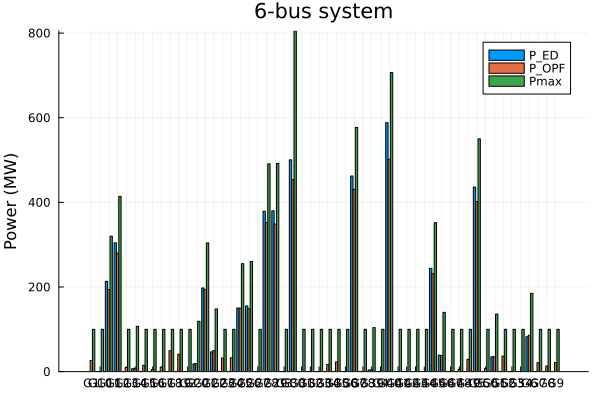

In [36]:
Power = [PG PG_opf Pmax]
Gen = repeat(["P_ED","P_OPF", "Pmax"], inner = 54)
nam = repeat("G" .* string.(1:54), outer = 3)

using Plots
using StatsPlots
# Create the dual bar chart
groupedbar(nam, Power, group = Gen, ylabel = "Power (MW)", title = "6-bus system")


In [25]:
# Create a DataFrame
df = DataFrame(branch = branch_indices,Active_Power_flow = PB, )
# Display the DataFrame
display(df)

Row,branch,Active_Power_flow
,Tuple…,Float64
1,"(56, 40, 41)",19.45
2,"(35, 28, 29)",13.7245
3,"(60, 34, 43)",10.0537
4,"(67, 42, 49)",-40.3427
5,"(73, 52, 53)",7.8839
6,"(115, 70, 75)",2.10289
7,"(112, 71, 72)",4.81748
8,"(185, 75, 118)",35.1689
9,"(86, 56, 59)",-20.3634


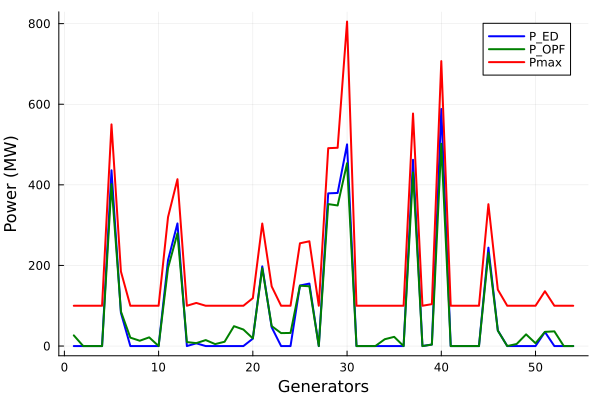

In [44]:
using Plots

# Assuming you have already defined PG, PG_opf, and Pmax arrays

# Create the initial plot for PG
plot(PG, label="P_ED", xlabel="Generators", ylabel="Power (MW)", linewidth=2, line=:solid, color=:blue)

# Add PG_opf to the existing plot
plot!(PG_opf, label="P_OPF", linewidth=2, line=:solid, color=:green)

# Add Pmax to the existing plot
plot!(Pmax, label="Pmax", linewidth=2, line=:solid, color=:red)


